In [1]:
import pandas as pd

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing
df = pd.read_csv('household_power_consumption_2010.txt', sep=';', 
                 parse_dates={'dt' : ['Date', 'Time']}, infer_datetime_format=True, keep_date_col = True, 
                 low_memory=False, na_values=['nan','?'], index_col='dt')
print('The shape of our features is:', df.shape)


The shape of our features is: (257583, 9)


In [3]:
df.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,245116.000000,245116.000000,245116.000000,245116.000000,245116.000000,245116.000000,245116.000000
mean,0.934322,0.137472,241.128671,3.985442,0.926659,0.995557,6.040724
std,0.858532,0.118183,2.628380,3.606815,5.426155,4.412561,8.242336
min,0.138000,0.000000,225.320000,0.600000,0.000000,0.000000,0.000000
25%,0.304000,0.058000,239.630000,1.400000,0.000000,0.000000,0.000000
50%,0.514000,0.106000,241.150000,2.400000,0.000000,0.000000,1.000000
75%,1.406000,0.206000,242.630000,5.800000,0.000000,1.000000,17.000000
max,9.724000,1.108000,253.530000,43.000000,81.000000,76.000000,31.000000


In [4]:
import datetime

In [5]:
df = df.assign(avg=df.loc[:, ["Global_active_power", "Global_reactive_power"]].mean(axis=1))

In [6]:
df.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,avg
count,245116.000000,245116.000000,245116.000000,245116.000000,245116.000000,245116.000000,245116.000000,245116.000000
mean,0.934322,0.137472,241.128671,3.985442,0.926659,0.995557,6.040724,0.535897
std,0.858532,0.118183,2.628380,3.606815,5.426155,4.412561,8.242336,0.447890
min,0.138000,0.000000,225.320000,0.600000,0.000000,0.000000,0.000000,0.070000
25%,0.304000,0.058000,239.630000,1.400000,0.000000,0.000000,0.000000,0.195000
50%,0.514000,0.106000,241.150000,2.400000,0.000000,0.000000,1.000000,0.356000
75%,1.406000,0.206000,242.630000,5.800000,0.000000,1.000000,17.000000,0.768000
max,9.724000,1.108000,253.530000,43.000000,81.000000,76.000000,31.000000,4.893000


In [7]:
df["Date"]


dt
2010-01-06 00:00:00      1/6/2010
2010-01-06 00:01:00      1/6/2010
2010-01-06 00:02:00      1/6/2010
2010-01-06 00:03:00      1/6/2010
2010-01-06 00:04:00      1/6/2010
                          ...    
2010-11-26 20:58:00    26/11/2010
2010-11-26 20:59:00    26/11/2010
2010-11-26 21:00:00    26/11/2010
2010-11-26 21:01:00    26/11/2010
2010-11-26 21:02:00    26/11/2010
Name: Date, Length: 257583, dtype: object

In [8]:
df["Date"]=pd.to_datetime(df["Date"])

In [9]:
df["Date"]

dt
2010-01-06 00:00:00   2010-01-06
2010-01-06 00:01:00   2010-01-06
2010-01-06 00:02:00   2010-01-06
2010-01-06 00:03:00   2010-01-06
2010-01-06 00:04:00   2010-01-06
                         ...    
2010-11-26 20:58:00   2010-11-26
2010-11-26 20:59:00   2010-11-26
2010-11-26 21:00:00   2010-11-26
2010-11-26 21:01:00   2010-11-26
2010-11-26 21:02:00   2010-11-26
Name: Date, Length: 257583, dtype: datetime64[ns]

In [10]:
# day
days = df["Date"].dt.day

In [11]:
months = df["Date"].dt.month

In [12]:
years = df["Date"].dt.year

In [13]:
# List and then convert to datetime object
dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]
dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in dates]

In [14]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt


In [15]:
plt.style.use('fivethirtyeight')

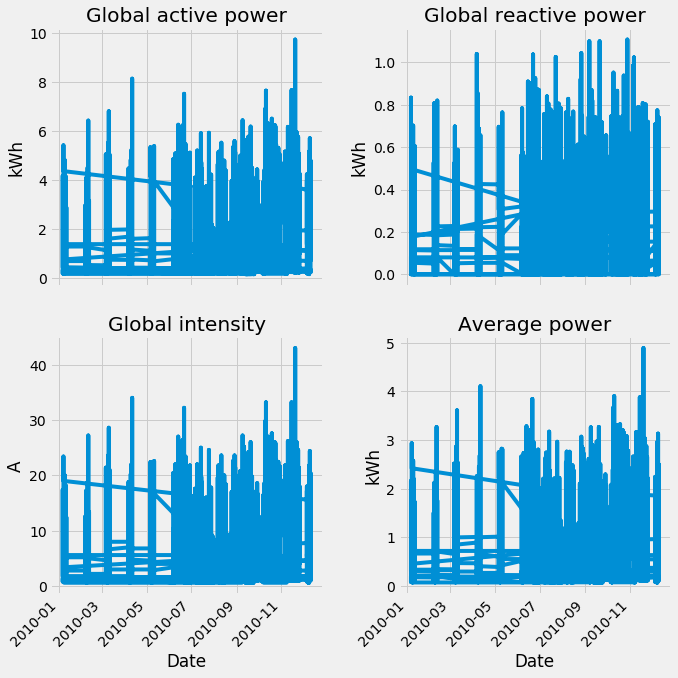

In [16]:
# Set up the plotting layout
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize = (10,10))
fig.autofmt_xdate(rotation = 45)
# Global Active Power
ax1.plot(dates, df['Global_active_power'])
ax1.set_xlabel(''); ax1.set_ylabel('kWh'); ax1.set_title('Global active power')

# 
ax2.plot(dates, df['Global_reactive_power'])
ax2.set_xlabel(''); ax2.set_ylabel('kWh'); ax2.set_title('Global reactive power')

# 
ax3.plot(dates, df['Global_intensity'])
ax3.set_xlabel('Date'); ax3.set_ylabel('A'); ax3.set_title('Global intensity')

# 
ax4.plot(dates, df['avg'])
ax4.set_xlabel('Date'); ax4.set_ylabel('kWh'); ax4.set_title('Average power')

plt.tight_layout(pad=2)


In [17]:
df = pd.get_dummies(df)
print(df)

                          Date  Global_active_power  Global_reactive_power  \
dt                                                                           
2010-01-06 00:00:00 2010-01-06                0.326                  0.084   
2010-01-06 00:01:00 2010-01-06                0.282                  0.000   
2010-01-06 00:02:00 2010-01-06                0.234                  0.052   
2010-01-06 00:03:00 2010-01-06                0.312                  0.000   
2010-01-06 00:04:00 2010-01-06                0.326                  0.070   
...                        ...                  ...                    ...   
2010-11-26 20:58:00 2010-11-26                0.946                  0.000   
2010-11-26 20:59:00 2010-11-26                0.944                  0.000   
2010-11-26 21:00:00 2010-11-26                0.938                  0.000   
2010-11-26 21:01:00 2010-11-26                0.934                  0.000   
2010-11-26 21:02:00 2010-11-26                0.932             

In [18]:
# Use numpy to convert to arrays
import numpy as np

In [19]:
# Labels are the values we want to predict
labels = np.array(df['Global_active_power'])

In [20]:
# Remove the labels from the df
# axis 1 refers to the columns
df= df.drop('Global_active_power', axis = 1)


In [21]:
# Saving df names for later use
df_list = list(df.columns)


In [22]:
# Convert to numpy array
df = np.array(df)

In [23]:

# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split


In [24]:
# Split the data into training and testing sets
train_df, test_df, train_labels, test_labels = train_test_split(df, labels, test_size = 0.25,
                                                                            random_state = 2889)


In [25]:
print('Training Features Shape:', train_df.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_df.shape)
print('Testing Labels Shape:', test_labels.shape)


Training Features Shape: (193187, 1448)
Training Labels Shape: (193187,)
Testing Features Shape: (64396, 1448)
Testing Labels Shape: (64396,)


In [26]:

# The baseline predictions
baseline_preds = test_df[:, df_list.index('avg')]

In [27]:
baseline_preds

array([0.278, 0.124, 0.176, ..., 0.892, 0.302, 0.735], dtype=object)

In [28]:
test_labels

array([0.356, 0.248, 0.262, ..., 1.222, 0.418, 1.208])

In [29]:
# Baseline errors, and display average baseline error
baseline_errors = abs(baseline_preds - test_labels)


In [30]:
aver = np.nanmean(baseline_errors,dtype='float32')

In [31]:
print('Average baseline error: ', round(aver,2),' kWh')


Average baseline error:  0.4  kWh


In [32]:
from sklearn.ensemble import RandomForestRegressor



In [33]:
# Instantiate model 
rf = RandomForestRegressor(n_estimators= 5, random_state=2889)


In [34]:
train_df[:,1:]

array([[0.364, 240.81, 6.2, ..., 0, 0, 0],
       [0.11199999999999999, 244.19, 7.6, ..., 0, 0, 0],
       [0.064, 236.54, 3.4, ..., 0, 0, 0],
       ...,
       [0.0, 240.14, 5.0, ..., 0, 0, 0],
       [0.055999999999999994, 243.38, 1.4, ..., 0, 0, 0],
       [0.212, 243.4, 2.4, ..., 0, 0, 0]], dtype=object)

In [35]:
print(train_df[:,1:])
print(type(train_df[:,1:]))

[[0.364 240.81 6.2 ... 0 0 0]
 [0.11199999999999999 244.19 7.6 ... 0 0 0]
 [0.064 236.54 3.4 ... 0 0 0]
 ...
 [0.0 240.14 5.0 ... 0 0 0]
 [0.055999999999999994 243.38 1.4 ... 0 0 0]
 [0.212 243.4 2.4 ... 0 0 0]]
<class 'numpy.ndarray'>


In [36]:
import pandas as pd

In [37]:
train_df=np.nan_to_num(train_df)

In [38]:
train_labels=np.nan_to_num(train_labels)

In [39]:
train_dff=pd.DataFrame(train_df)

In [40]:
train_labelss=pd.DataFrame(train_labels)

In [41]:
np.where(train_labelss.values >= np.finfo(np.float32).max)

(array([], dtype=int64), array([], dtype=int64))

In [42]:
np.warnings.filterwarnings('ignore')

In [43]:
train_dff = train_dff.iloc[: , 1:]

In [44]:
np.where(train_dff.values >= np.finfo(np.float32).max)

(array([], dtype=int64), array([], dtype=int64))

In [45]:
train_dff.to_numpy()
train_labelss.to_numpy()

array([[1.45 ],
       [1.854],
       [0.786],
       ...,
       [1.226],
       [0.3  ],
       [0.544]])

In [46]:
train_dff = np.float64(train_dff)
train_labelss = np.float64(train_labelss)

In [47]:
train_df=train_df[:,1:]


In [48]:
np.isnan(train_labels).sum()

0

In [49]:
np.isinf(train_labels).sum()

0

In [50]:
pd.isnull(train_df).sum()

65240

In [51]:
train_dff=pd.DataFrame(train_df)

In [52]:
train_dff.dropna(inplace=True)

In [53]:
train_df = train_dff.to_numpy()

In [54]:
pd.isnull(train_df).sum()

0

In [55]:
print(train_df.dtype)

object


In [56]:
print(train_labels.dtype)

float64


In [57]:
print(train_df.astype(np.float32))

[[3.6400e-01 2.4081e+02 6.2000e+00 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 [1.1200e-01 2.4419e+02 7.6000e+00 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 [6.4000e-02 2.3654e+02 3.4000e+00 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 ...
 [0.0000e+00 2.4014e+02 5.0000e+00 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 [5.6000e-02 2.4338e+02 1.4000e+00 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 [2.1200e-01 2.4340e+02 2.4000e+00 ... 0.0000e+00 0.0000e+00 0.0000e+00]]


In [59]:
print(train_labels)

[1.45  1.854 0.786 ... 1.226 0.3   0.544]


In [62]:
# Train the model on training data
rf.fit(train_df[1:800], train_labels[1:800])

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=5, n_jobs=None, oob_score=False,
                      random_state=2889, verbose=0, warm_start=False)

[[2.0000e-01 2.4325e+02 1.6000e+00 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 2.4170e+02 1.0000e+00 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 [9.0000e-02 2.3970e+02 1.2000e+00 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 ...
 [5.6200e-01 2.4099e+02 5.6000e+00 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 [1.8600e-01 2.3994e+02 1.8000e+00 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 [2.6200e-01 2.4126e+02 5.2000e+00 ... 0.0000e+00 0.0000e+00 0.0000e+00]]


In [69]:
pd.isnull(test_df).sum()

22029

In [70]:
test_dff=pd.DataFrame(test_df)

In [71]:
test_dff.dropna(inplace=True)

In [72]:
test_df = test_dff.to_numpy()

In [73]:
pd.isnull(test_df).sum()

0

In [74]:
print(test_df.dtype)

object


In [75]:
print(test_df[:,1:].astype(np.float32))

[[2.0000e-01 2.4325e+02 1.6000e+00 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 2.4170e+02 1.0000e+00 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 [9.0000e-02 2.3970e+02 1.2000e+00 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 ...
 [5.6200e-01 2.4099e+02 5.6000e+00 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 [1.8600e-01 2.3994e+02 1.8000e+00 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 [2.6200e-01 2.4126e+02 5.2000e+00 ... 0.0000e+00 0.0000e+00 0.0000e+00]]


In [76]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_df[:,1:].astype(np.float32))


In [80]:
# Calculate the absolute errors
errors = abs(predictions[1:800] - test_labels[1:800])


In [83]:
mean = np.nanmean(errors,dtype='float32')

In [85]:
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(mean, 2), ' kWh')

Mean Absolute Error: 0.67  kWh


In [89]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * ((errors[1:600]) / test_labels[1:600])

In [93]:
# Calculate and display accuracy
accuracy = 200 - np.nanmean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 46.48 %.


In [94]:
rf_new = RandomForestRegressor(n_estimators = 100, criterion = 'mse', max_depth = None, 
                               min_samples_split = 2, min_samples_leaf = 1)


In [95]:
#Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot

In [101]:

# Pull out one tree from the forest
tree = rf.estimators_[4]